**Part 3 - Closure in 3D for f_WBZ using the IEM**

This notebook implements the interaction by exchange with the mean model (IEM) as introduced by (Dopazo, C. & O'Brien, E. 1974) and discussed by (Pope, S.B. 2010), in order to obtain a closure for the Boussinesq equations

\begin{align}
    \frac{D \boldsymbol{U} }{Dt} &= -\nabla P + Ri \, B \boldsymbol{\hat{z}} + \frac{\Delta \boldsymbol{U}}{Re}, \\
    \frac{D B }{Dt}              &= \frac{\Delta B}{Pr Re}\\ 
    \nabla \cdot \boldsymbol{U}  &= 0. \\
\end{align}

We model the time evolution of the PDF $f_{\boldsymbol{Y}}$ for $\boldsymbol{Y} = (W,B,Z)$.

*Evolution equation*

Letting $\alpha, \nu = (Pr Re)^{-1}, Re^{-1}$ the joint pdf $f_{\boldsymbol{Y}}$ evolves, for a periodic/unbounded domain, according to 

\begin{equation}
    \frac{\partial f_{\boldsymbol{Y}} }{\partial t} + \frac{\partial }{\partial z} \left( w f_{\boldsymbol{Y}} \right) = -  \frac{\partial }{\partial w} \left( \mathbb{E}_{\boldsymbol{Y}}[ Ri_B B -\nabla_Z P ] f_{\boldsymbol{Y}} \right) - \frac{\partial }{\partial b} \left( \mathbb{E}_{\boldsymbol{Y}}[ \alpha \Delta B ] f_{\boldsymbol{Y}} \right) - \frac{\partial }{\partial w} \left( \mathbb{E}_{\boldsymbol{Y}}[ \nu \Delta W ] f_{\boldsymbol{Y}} \right).
\end{equation}

<!-- In a bounded domain it is more convinient to express the previous equation as

\begin{equation}
    \frac{\partial f_{\boldsymbol{Y}} }{\partial t} + \frac{\partial }{\partial z} \left( w f_{\boldsymbol{Y}} \right) = - \frac{\partial }{\partial b} \left( Q(B) f_{\boldsymbol{Y}} \right) -  \frac{\partial }{\partial w} \left( \mathbb{E}_{\boldsymbol{Y}}[ B \boldsymbol{\hat{z}} -\nabla P ] f_{\boldsymbol{Y}} \right) - \frac{\partial^2 }{\partial b^2} \left( \mathbb{E}_{\boldsymbol{Y}}[ \alpha |\nabla B|^2 ] f_{\boldsymbol{Y}} \right) - \frac{\partial^2 }{\partial w^2} \left( \mathbb{E}_{\boldsymbol{Y}}[ \alpha |\nabla W|^2 ] f_{\boldsymbol{Y}} \right) - 2 \frac{\partial^2 }{\partial w \partial b} \left( \mathbb{E}_{\boldsymbol{Y}}[ \alpha \nabla W \cdot \nabla B ] f_{\boldsymbol{Y}} \right) + \frac{\partial^2 }{\partial z^2} f_{\boldsymbol{Y}},
\end{equation}

in order to expose the boundary conditions on $W$ and $B$.  -->

Terms $\mathbb{E}_{\boldsymbol{Y}}[\alpha  \Delta B ]$ and $\mathbb{E}_{\boldsymbol{Y}}[ \nu  \Delta W ]$ are responsible for micro-scale molecular mixing locally in buoyancy space and in for viscous dissipation in velocity space, while $\mathbb{E}_{\boldsymbol{Y}}[-\nabla_Z P ]$ is responsible for ensuring incompressibility. All these terms are unknown and must be modelled.

*Molecular mixing closure*

For the conditional diffusion of buoyancy we will employ the IECM model of (Fox, R.O. 1996). To account for the vertical inhomogeneity we write the molecular diffusion term in terms of its horizontal $\Delta_H$ and vertical $\Delta_Z$ components as 

\begin{equation}
\mathbb{E}_{\boldsymbol{Y}}[ \alpha \Delta B ] = \mathbb{E}_{\boldsymbol{Y}}[ \alpha \Delta_H B ] + \mathbb{E}_{\boldsymbol{Y}}[ \alpha \Delta_Z B].
\end{equation}

Assuming statistically homogeneous horizontal slices, we apply the IECM model to horizontal slices

\begin{equation}
  \mathbb{E}_{\boldsymbol{Y}}[ \alpha \Delta_H B ] = -\frac{\alpha}{\tau_{B}(t)} \left( b - \mathbb{E}_{WZ}[B] \right),
\end{equation}

where $\tau_B(t)$ defines a characteristic time-scale of the buoyancy fluctuations. For the vertical gradient however we need a further assumption. Opting to relate the horizontal and vertical gradients via the parameter $\lambda_B(z)$ which characterises the ratio of the vertical and horizontal Taylor microscales we can write

\begin{equation}
  \mathbb{E}_{\boldsymbol{Y}}[ \alpha \Delta B ] = -\frac{\alpha(1 + \lambda_B)}{\tau_{B}(t)} \left( b - \mathbb{E}_{WZ}[B] \right).
\end{equation}


*Velocity PDF closure*

For the conditional diffusion of velocity term we will employ the GLM model of (Pope, S.B. 2010) and adopt a similar approach to that taken for the molecular-mixing term by splitting the viscous diffusion term in terms of its horizontal $\Delta_H$ and vertical $\Delta_Z$ components as 

\begin{equation}
\mathbb{E}_{\boldsymbol{Y}}[ \nu \Delta W ] = \mathbb{E}_{\boldsymbol{Y}}[ \nu \Delta_H W  ] + \mathbb{E}_{\boldsymbol{Y}}[ \nu \Delta_Z W ].
\end{equation}

Assuming statistically homogeneous horizontal slices, we apply the IECM model to horizontal slices

\begin{equation}
  \mathbb{E}_{\boldsymbol{Y}}[ \nu \Delta_H W ] f_{\boldsymbol{Y}} = - \frac{\nu}{\tau_{W}(t)} \left( w - \mathbb{E}_{BZ}[W] \right) f_{\boldsymbol{Y}} - \frac{C_0 \epsilon}{2} \frac{\partial f_{\boldsymbol{Y}}}{\partial w},
\end{equation}

where $\tau_W(t)$ defines a characteristic time-scale of the velocity fluctuations. For the vertical gradient however we need a further assumption. Opting to relate the horizontal and vertical gradients via the parameter $\lambda_W(z)$ which characterises the ratio of the vertical and horizontal Taylor microscales we can write

\begin{equation}
  \mathbb{E}_{\boldsymbol{Y}}[ \nu \Delta W ] f_{\boldsymbol{Y}} = - \frac{\nu(1 + \lambda_W(z))}{\tau_{W}(t)} \left( w - \mathbb{E}_{BZ}[W] \right) f_{\boldsymbol{Y}} - \frac{C_0 \epsilon}{2} \frac{\partial f_{\boldsymbol{Y}}}{\partial w}.
\end{equation}

*Pressure Gradient*

To model the vertical pressure gradient we can volume integrating the Boussinesq equations to obtain
\begin{equation}
\frac{1}{V} \int_{\Omega} \frac{\partial W}{\partial t} d \mathbb{x} = \frac{1}{V} \int_{\Omega} \left( -\frac{\partial P}{\partial z} + B \right) d \mathbb{x}
\end{equation}
provided we have periodic boundary conditions or $W=0$ on the domain boundary $\partial \Omega$. This implies that the time-rate of change of the vertical velocity is zero if the system is in hydrostatic balance. This suggests at least to first order hydrostatic equilibrium may provide a good approximation. Averaging over a horizontal area (in order to retain $Z$) we obtain for a periodic domain 
\begin{equation}
\frac{1}{A} \int \frac{\partial W}{\partial t} dS = \frac{1}{A} \int \left( -\frac{\partial P}{\partial z} + B \right) dS + \alpha_1 \frac{\partial^2 \overline{W}}{\partial z^2} - \frac{\partial \overline{W}^2}{\partial z},
\end{equation}
where the overline is used to denote a horizontal average. Using the fact that $\frac{1}{V} \int f \; d\mathbb{x} = \mathbb{E}[f]$ and $\frac{1}{A} \int f \; dS = \mathbb{E}_Z[f]$ we can re-write the previous equation as
\begin{equation}
\frac{\partial }{\partial t} \mathbb{E}_Z[W] = \mathbb{E}_Z[-\nabla_Z P + B] + \mathbb{E}_Z[R]
\end{equation}
where due to incompressibility the first term may be set to zero. Neglecting $\mathbb{E}_Z[R] = 0$ in order to obtain a first order approximation of the conditional expectation of the pressure gradient we write 
\begin{align*}
\mathbb{E}_Z[-\nabla_Z P + B] &= 0,\\
\mathbb{E}_Y[-\nabla_Z P] &= -\mathbb{E}_Z[B],\\
\mathbb{E}_Y[B-\nabla_Z P] &= \mathbb{E}_Y[B] - \mathbb{E}_Z[B],\\
\mathbb{E}_Z[ \mathbb{E}_Y[B] ] - \mathbb{E}_Z[B] &= 0, \\
\end{align*}
and so we will use the average of $B$ conditioned on $Y$ ($\mathbb{E}_Y[-\nabla_Z P] = -\mathbb{E}_Z[B]$) to model the conditional average of the vertical pressure gradient.

*Closed evolution equation*

Substituting the closures for the unknown terms we obtain

\begin{align*}
    \frac{\partial f_{\boldsymbol{Y}} }{\partial t} = -\frac{\partial }{\partial z} \left( w f_{\boldsymbol{Y}} \right) -  \frac{\partial }{\partial w} \left[ \left(b - \mathbb{E}_{WZ}[B] \right) f_{\boldsymbol{Y}} \right] + \frac{\partial }{\partial b} \left[ \left( b - \mathbb{E}_{WZ}[B] \right) f_{\boldsymbol{Y}} \right] + \frac{\partial }{\partial w} \left[ \left( w - \mathbb{E}_{BZ}[W] \right) f_{\boldsymbol{Y}} \right] + \frac{\partial^2 f_{\boldsymbol{Y}}}{\partial w^2}.
\end{align*}

which is an integro-differential equation, as

\begin{equation}
\mathbb{E}_{WZ}[B] = \int b f_{B|WZ}(b|w,z;t) db, \qquad \mathbb{E}_{BZ}[W] = \int w f_{W|BZ}(w|b,z;t) dw.
\end{equation}

depends on the PDF at each time-instant. Subject to specifying the ratio of the Taylor microscales $\lambda_B(z), \lambda_W(z)$, the diffusive time-scales $\tau_B, \tau_W$ and the viscous dissipation rate $C_0 \epsilon$ this equation is closed and can be solved numerically.

**Setup**

We first import the required libraries to implement this model.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import trapezoid as trapz
from derivatives import *
from scipy.stats import norm

from   scipy import sparse
import scipy.sparse.linalg as sla

We then define a computation grid for $f_{Y}(w,b,z;t)$ in terms of $w,b,z$. When defining the $f^n_Y(w,b,z) = f_{WBZ}(w,b,z,t=t_n)$ we use 3 dimensional arrays where axis 0 is $w$, axis 1 is $b$ and axis 2 $z$.

In [2]:
# Boundary conditions
bc_b = 'Neumann'
bc_w = 'Neumann'
bc_z = 'Neumann'

# Numerical resolution
N_w = 24
N_b = 24
N_z = 12

# Domain
w_min =-2
w_max = 2

b_min =-2
b_max = 2

z_min =-1/2
z_max = 1/2

w_grid = np.linspace(w_min, w_max, N_w) 
b_grid = np.linspace(b_min, b_max, N_b)
z_grid = np.linspace(z_min, z_max, N_z)


# Time-scales
omega_B = 1
omega_W = 1

sigma_B = 1  # Diffusion coefficient
sigma_W = 1  # Diffusion coefficient

We then define the operators to evolve the PDF.

In [ ]:
def operators_EXP(w, b):
  
  from scipy.sparse import kron

  I_w = np.eye(N_w)  
  I_b = np.eye(N_b)

  D_w = kron(sparse_grad(w), I_b)
  D_b = kron(I_w, sparse_grad(b))

  L_w = kron(sparse_laplacian(w,bcs=bc_w),I_b) 
  L_b = kron(I_w,sparse_laplacian(b,bcs=bc_b))

  return D_w, D_b, L_w, L_b

def solve_EXP(f, w, b, z, Δt, L_w, L_b, D_w, D_b):

  # a) Compute diffusion from W
  W = np.kron(w, np.ones(N_b))
  B = np.kron(np.ones(N_w), b)
  
  f_Y = f.reshape((N_w, N_b, N_z)) # (w, b, z)

  RHS_w = 0*f_Y
  RHS_b = 0*f_Y
  RHS_z = 0*f_Y

  for i, z_i in enumerate(z):

    f_i = f_Y[:, :, i].flatten()

    # b.1) Compute the expectation velocity  
    EW_cB = np.nansum((W*f_i).reshape((N_w, N_b)), axis=0)/np.nansum(f_i.reshape((N_w, N_b)), axis=0)
    EW_cB[np.isnan(EW_cB)] = 0
    EW_cB = np.kron(EW_cB, np.ones(N_w)) 
    
    # b.2) Compute the expectation buoyancy  
    EB_cW = np.nansum((B*f_i).reshape((N_w, N_b)), axis=1)/np.nansum(f_i.reshape((N_w, N_b)), axis=1)
    EB_cW[np.isnan(EB_cW)] = 0
    EB_cW = np.kron(EB_cW, np.ones(N_b)) 
    
    #c) Define the RHS
    RHS_w[:, :, i] = (-D_w@((B - EB_cW)*f_i) + D_w@((W - EW_cB)*f_i) + 0.2*L_w@f_i).reshape((N_w, N_b))
    RHS_b[:, :, i] = (                         D_b@((B - EB_cW)*f_i) + 0.2*L_b@f_i).reshape((N_w, N_b))

    dz = z[1] - z[0]
    if i == 0:
      RHS_z[:, :, i] = 0.2*( (2*f_Y[:, :, i+1] - 2*f_Y[:, :, i]                    )/(dz**2) )    
    elif i == (N_z-1):
      RHS_z[:, :, i] = 0.2*( (                 - 2*f_Y[:, :, i] + 2*f_Y[:, :, i-1] )/(dz**2) )    
    else:
      RHS_z[:, :, i] = -W.reshape((N_w, N_b))*( (f_Y[:, :, i+1] - f_Y[:, :, i-1] )/(2*dz) )  + 0.2*( (f_Y[:, :, i+1] - 2*f_Y[:, :, i] + f_Y[:, :, i-1] )/(dz**2) )    

  return f + Δt*(RHS_w + RHS_b + RHS_z).flatten()

We then wrap these in a time-stepping routine.

In [10]:
def plotter(f, w, b, z, t):

  print('int f_WBZ dwdbdz = %3.3f, t = %3.3f \n' %(trapz(y=trapz(y=trapz(y=f.reshape((N_w,N_b,N_z)),x=w,axis=0),x=b,axis=0),x=z), t) )

  fig, ax = plt.subplots(nrows=2, ncols=3, layout='constrained')

  f_w = trapz(y=trapz(y=f.reshape((N_w,N_b,N_z)),x=b,axis=1),x=z,axis=1)
  f_b = trapz(y=trapz(y=f.reshape((N_w,N_b,N_z)),x=w,axis=0),x=z,axis=1)
  f_z = trapz(y=trapz(y=f.reshape((N_w,N_b,N_z)),x=w,axis=0),x=b,axis=0)

  # First column
  ax[0,0].set_ylabel('$f_w$')
  ax[0,0].set_xlabel('$w$')
  ax[0,0].plot(w, f_w)

  ax[1,0].set_title(r'$f_{wz}$')
  cf = ax[1,0].pcolormesh(z,w,trapz(y=f.reshape((N_w,N_b,N_z)),x=b,axis=1), cmap='Reds')
  ax[1,0].set_xlabel('$z$')
  ax[1,0].set_ylabel('$w$')

  # Second column
  ax[0,1].set_ylabel('$f_b$')
  ax[0,1].set_xlabel('$b$')
  ax[0,1].plot(b, f_b)

  ax[1,1].set_title(r'$f_{bz}$')
  cf = ax[1,1].pcolormesh(z,b,trapz(y=f.reshape((N_w,N_b,N_z)),x=w,axis=0), cmap='Reds')
  ax[1,1].set_xlabel('$z$')
  ax[1,1].set_ylabel('$b$')

  # Third column
  ax[0,2].set_ylabel('$f_z$')
  ax[0,2].set_xlabel('$z$')
  ax[0,2].plot(z, f_z)

  ax[1,2].set_title(r'$f_{wb}$')
  cf = ax[1,2].pcolormesh(b,w,trapz(y=f.reshape((N_w,N_b,N_z)),x=z,axis=2), cmap='Reds')
  ax[1,2].set_xlabel('$b$')
  ax[1,2].set_ylabel('$w$')

  plt.show()

  return None

def solver(f, w, b, z, T, Δt):

  f_frames = []
  f_frames.append(f)

  D_w, D_b, L_w, L_b = operators_EXP(w, b) 

  # Loop over all time instants
  for n,t in enumerate(T):
  
    # 0) Plot the system out
    if n%(len(T)//10) == 0:
      plotter(f, w, b, z ,t)

    # 1) Update the mapping
    f = solve_EXP(f, w, b, z, Δt, L_w, L_b, D_w, D_b)

    # 2) Grab the system state
    f_frames.append(f)

  return None

Finally we specify a time interval, initial conditions and time-step the system

Δt =  0.002002002002002002
int f_WBZ dwdbdz = 0.997, t = 0.000 



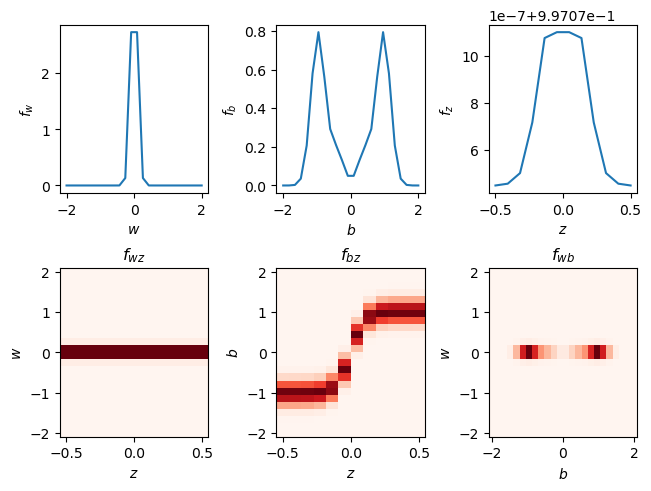

int f_WBZ dwdbdz = 0.997, t = 0.200 



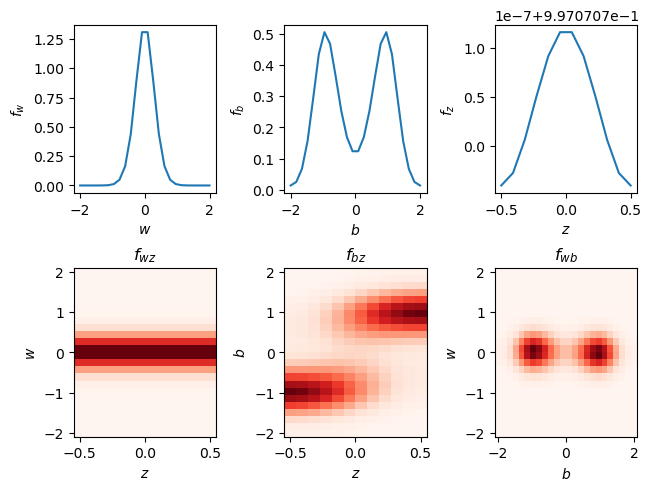

int f_WBZ dwdbdz = 0.997, t = 0.400 



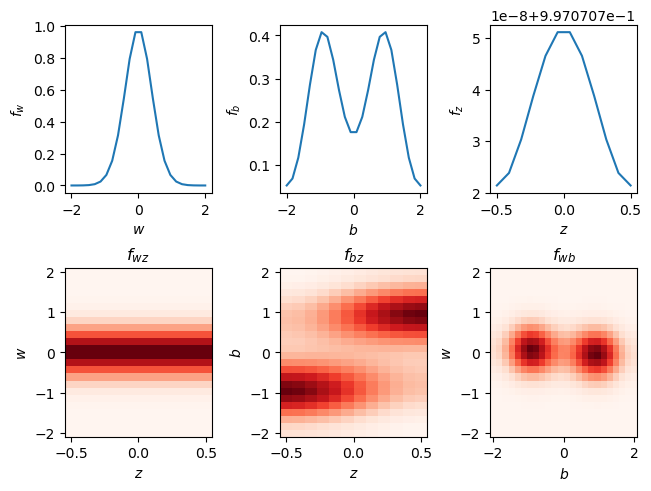

int f_WBZ dwdbdz = 0.997, t = 0.601 



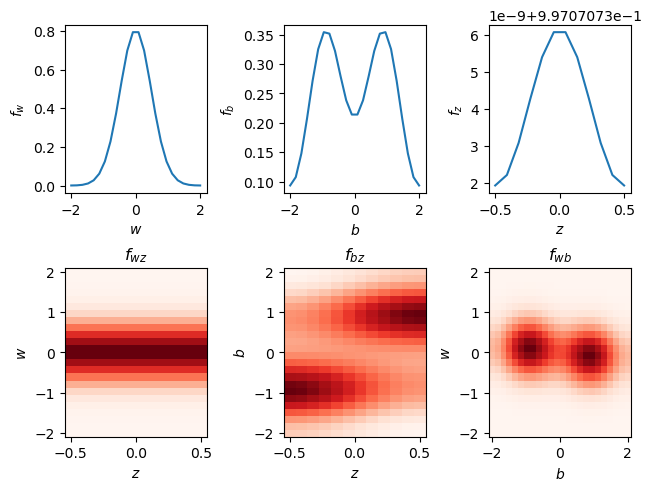

int f_WBZ dwdbdz = 0.997, t = 0.801 



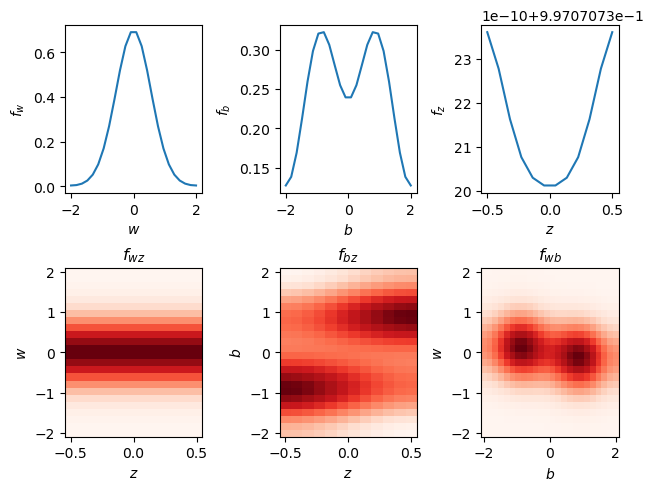

int f_WBZ dwdbdz = 0.997, t = 1.001 



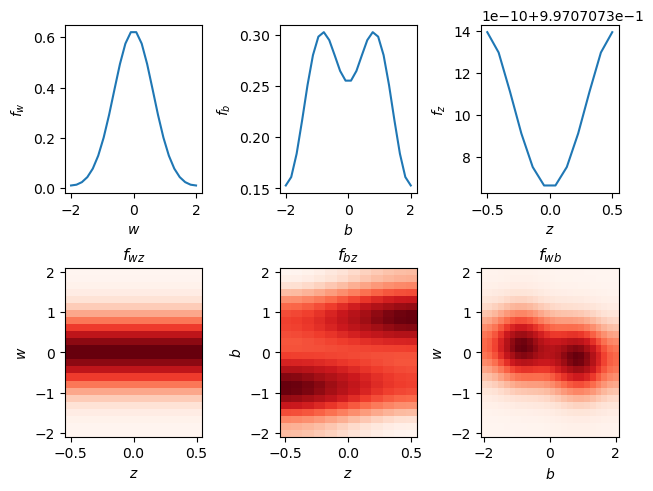

int f_WBZ dwdbdz = 0.997, t = 1.201 



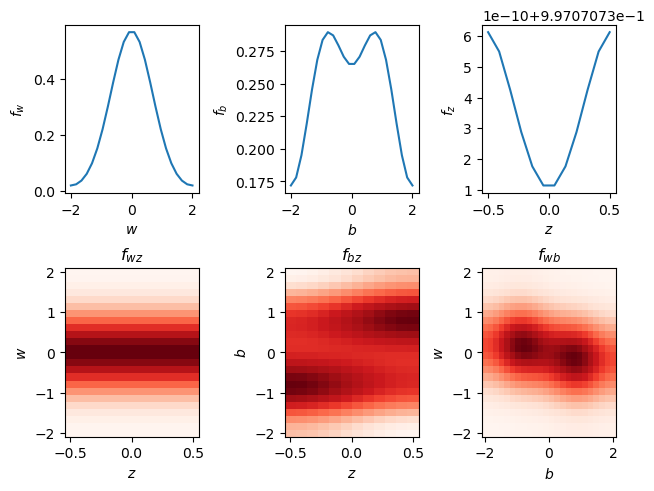

int f_WBZ dwdbdz = 0.997, t = 1.401 



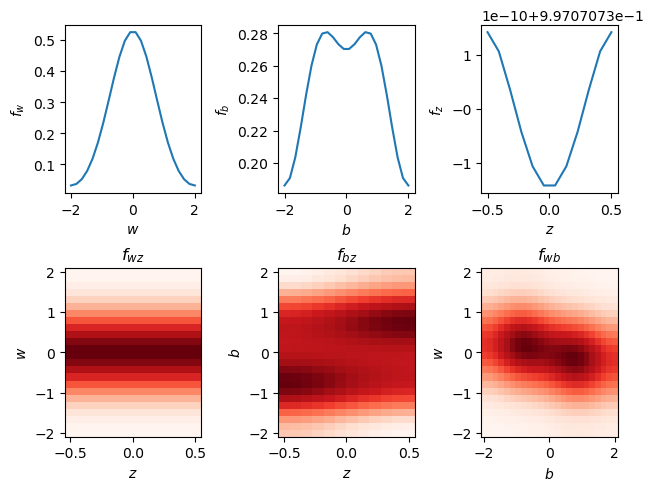

int f_WBZ dwdbdz = 0.997, t = 1.602 



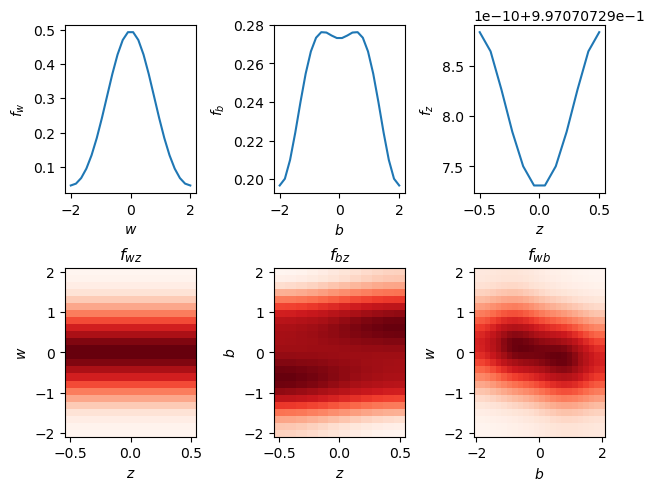

int f_WBZ dwdbdz = 0.997, t = 1.802 



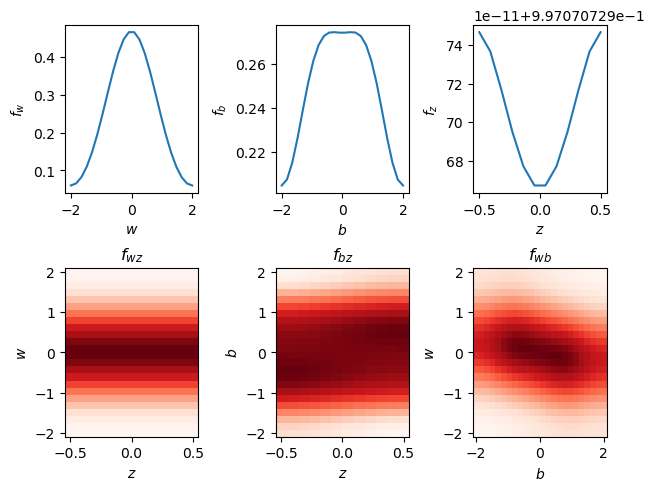

In [11]:
N_T = 10**3
T, Δt = np.linspace(0, 2, N_T, retstep=True)
print('Δt = ',Δt)

# Create a two layer stratification
g = lambda  z, mu, sigma : np.exp(-.5*((z - mu)/sigma)**2)/np.sqrt(2*np.pi*sigma**2)
f = np.zeros((N_w, N_b, N_z))

# Lower layer
f_w = g(w_grid, mu=0, sigma=0.1)
for i in range(N_z):
    f_b = g(b_grid, mu=np.tanh(10*z_grid[i]), sigma=0.2)
    f[:, :, i] = np.kron(f_w, f_b).reshape((N_w, N_b))

f = f.flatten()
#plotter(f, w_grid, b_grid, z_grid, 0)

# Flatten the input f for solver
solver(f, w_grid, b_grid, z_grid, T, Δt)